[codebasics](https://www.youtube.com/watch?v=J_LnPL3Qg70&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=3)

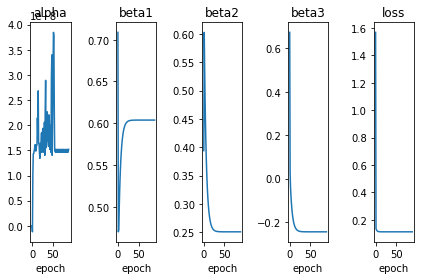

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
tf.set_random_seed(0)

lr = 1e-2
epoch = int(9e3)

if 0:
    df = pd.read_csv('homeprices.csv')
elif 1:
    data = {
        'area': [2600,3000,3200,3600,4000,4100],
        'bedrooms': [3,4,np.nan,3,5,6],
        'age': [20,15,18,30,8,8],
        'price': [550000,565000,610000,595000,760000,810000]
        }
    df = pd.DataFrame(data)

df.bedrooms = df.bedrooms.fillna(df.bedrooms.median()) 

if 0:
    # not good
    pass
elif 1:
    # good
    df = (df-df.mean()) / df.std()

x_data = df[['area','bedrooms','age']].values.astype(np.float32) # (6,3)
y_data = df.price.values.astype(np.float32).reshape((-1,1)) # (6,1)

x = tf.placeholder(tf.float32, shape=(None,3)) # (6,3)
y = tf.placeholder(tf.float32, shape=(None,1)) # (6,1)

if 0:
    alpha = tf.get_variable('alpha', (), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.0))
    beta = tf.get_variable('beta', (3,1), dtype=tf.float32, initializer=tf.keras.initializers.constant(1.0))
elif 0:
    alpha = tf.get_variable('alpha', (), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.5))
    beta = tf.get_variable('beta', (3,1), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.5))
elif 1:
    alpha = tf.get_variable('alpha', (), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.0))
    beta = tf.get_variable('beta', (3,1), dtype=tf.float32, initializer=tf.keras.initializers.RandomUniform())
elif 1:
    alpha = tf.get_variable('alpha', (), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.0))
    beta = tf.get_variable('beta', (3,1), dtype=tf.float32, initializer=tf.keras.initializers.RandomNormal())

y_pred = alpha + x @ beta
loss = tf.nn.l2_loss(y-y_pred)
train = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

with tf.Session() as sess:
    
    tf.global_variables_initializer().run()
    
    alpha_trace = []
    beta1_trace = []
    beta2_trace = []
    beta3_trace = []
    loss_trace = []
    
    feed_dict = {x:x_data, y:y_data}
    for i in range(epoch):
        if i == 0:
            alpha_run, beta_run, loss_run = sess.run([alpha, beta, loss], feed_dict=feed_dict)
        else:
            alpha_run, beta_run, loss_run, _ = sess.run([alpha, beta, loss, train], feed_dict=feed_dict)
        alpha_trace.append(alpha_run)
        beta1_trace.append(beta_run[0,0])
        beta2_trace.append(beta_run[1,0])
        beta3_trace.append(beta_run[2,0])
        loss_trace.append(loss_run)   
    y_pred_run = sess.run(y_pred, feed_dict=feed_dict)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
ax1.plot(alpha_trace[::100])
ax1.set_xlabel('epoch')
ax1.set_title('alpha')
ax2.plot(beta1_trace[::100])
ax2.set_xlabel('epoch')
ax2.set_title('beta1')
ax3.plot(beta2_trace[::100])
ax3.set_xlabel('epoch')
ax3.set_title('beta2')
ax4.plot(beta3_trace[::100])
ax4.set_xlabel('epoch')
ax4.set_title('beta3')
ax5.plot(loss_trace[::100])
ax5.set_xlabel('epoch')
ax5.set_title('loss')
plt.tight_layout()
plt.show()

In [2]:
np.max(alpha_trace)

4.6789626e-08